In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import random

In [5]:
from tqdm import tqdm

In [6]:
#load directly from npy files #this step skips the data loading from folders as images
off_dataset = np.load('off_dataset.npy')
target_dataset = np.load('target_dataset.npy')

In [7]:
import tensorflow as tf

In [19]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
#### model
model = tf.keras.models.load_model('model_seed10_epoch50.hdf5',compile=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
np.random.seed(0)

In [24]:
emx1_pos = [0,1] + list(range(91,473))    #0,1,91-472

In [35]:
emx1_neg = list(range(7234,7278))+list(range(7663,8179))+list(range(10342,11297))+list(range(18566,27290))+list(range(55388,69585))
# 7234-7277,7663-8178,10342-11296,18566-27289,55388-69584

In [36]:
len(emx1_pos),len(emx1_neg)

(384, 24436)

In [301]:
#set_of_random_pos = np.random.choice(7130, 50, replace=False) 50images 1 sec for 1 iteration; 100images 1.5sec for 1iteration
emx1_pos_set = np.asarray(random.sample(emx1_pos, 150))
emx1_neg_set = np.asarray(random.sample(emx1_neg, 150))

In [302]:
set_of_random = np.concatenate((emx1_pos_set,emx1_neg_set))

In [303]:
# # select a set of background examples to take an expectation over
bg1 = off_dataset[set_of_random]
bg2 = target_dataset[set_of_random]

In [304]:
e = shap.DeepExplainer(([model.layers[2].input, model.layers[3].input], model.layers[-1].output), [bg1, bg2])

In [91]:
##### sample 
#sample_id = 1

In [93]:
# fig  = plt.figure(figsize=(10,4),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
# ax = fig.gca()
# plt.subplots_adjust(hspace = .1, wspace = .1)
# plt.subplot(2,1,1)
# plt.axis('off')
# plt.imshow(x1.squeeze(), cmap='gray')
# plt.title('off_target', color='k')
# plt.subplot(2,1,2)
# plt.axis('off')
# plt.imshow(x2.squeeze(), cmap='gray')
# plt.title('target', color='k')

In [290]:
# x1.shape, x2.shape

In [95]:
# shap_values = e.shap_values([x1, x2])

In [96]:
# off_shap = shap_values[0][0]
# tar_shap = shap_values[0][1]

In [124]:
# fig  = plt.figure(figsize=(15,5),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
# ax = fig.gca()
# plt.subplots_adjust(hspace = .1, wspace = .1)
# plt.subplot(2,3,1)
# plt.axis('off')
# plt.imshow(x1.squeeze(), cmap='gray')
# plt.title('off_target', color='k')
# plt.subplot(2,3,4)
# plt.axis('off')
# plt.imshow(x2.squeeze(), cmap='gray')
# plt.title('target', color='k')
# plt.subplot(2,3,2)
# plt.axis('off')
# plt.imshow(off_shap.squeeze(), cmap='jet', interpolation='bilinear')
# plt.title('Off Target SHAP', color='k')
# plt.subplot(2,3,5)
# plt.axis('off')
# plt.imshow(tar_shap.squeeze(), cmap='jet', interpolation='bilinear')
# plt.title('Target SHAP', color='k')
# plt.subplot(2,3,3)
# plt.axis('off')
# plt.imshow(x1.squeeze(), cmap='gray')
# plt.imshow(off_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
# plt.title('Off Target SHAP Superimposed', color='k')
# plt.subplot(2,3,6)
# plt.axis('off')
# plt.imshow(x2.squeeze(), cmap='gray')
# plt.imshow(tar_shap.squeeze(), cmap='jet', interpolation='bilinear', alpha=0.7)
# plt.title('Target SHAP Superimposed', color='k')
# plt.tight_layout()
# fig.suptitle('DEEP Explainer SHAP : seq_no_' + str(sample_id) , fontsize=20, color='k')
# plt.show()
# ##plt.savefig('DEEPExplainer_SHAP'+str(sample_id)+'.png', dpi=800)

In [276]:
######## images overlayed together
#temp_arr = emx1_pos#### [0,1,91] ### smol sample test
temp_arr = np.asarray(random.sample(emx1_neg, 384))### setting 384 as the positive samples is 384 

In [278]:
#temp_arr

In [305]:
mat_off_shap = np.zeros((len(temp_arr),4,28,1))
mat_tar_shap = np.zeros((len(temp_arr),4,28,1))

for index,item in enumerate(tqdm(temp_arr)):
    img_x1 = off_dataset[item:item+1]
    img_x2 = target_dataset[item:item+1]
    shap_values = e.shap_values([img_x1, img_x2])
    #off_shap = shap_values[0][0]
    #tar_shap = shap_values[0][1]
    mat_off_shap[index,:,:,:] = shap_values[0][0]
    mat_tar_shap[index,:,:,:] = shap_values[0][1]

100%|██████████| 384/384 [13:51<00:00,  2.17s/it]


In [306]:
mat_off_shap.shape, mat_tar_shap.shape

((384, 4, 28, 1), (384, 4, 28, 1))

In [293]:
#plt.imshow(mat_off_shap[0].squeeze(), cmap='jet', interpolation='bilinear') 
## exampple to test if correct sequence went inside the matrix

In [307]:
overlay_off_shap = np.mean(mat_off_shap,axis=0)
overlay_tar_shap = np.mean(mat_tar_shap,axis=0)

In [295]:
# ticks=np.arange(0,28)

In [296]:
# plt.gca().set_xticks(ticks)
# plt.imshow(overlay_off_shap.squeeze(), cmap='seismic', interpolation='nearest')


In [297]:

# plt.imshow(overlay_tar_shap.squeeze(), cmap='seismic', interpolation='nearest')

In [248]:
# fig  = plt.figure(figsize=(10,4),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
# ax = fig.gca()
# plt.subplots_adjust(hspace = .5, wspace = .1)
# # plt.subplot(2,1,1)
# plt.axis('off')
# plt.imshow(overlay_off_shap.squeeze(), cmap='seismic', interpolation='nearest')
# plt.title('off_target', color='k')
# plt.subplot(2,1,2)
# plt.axis('off')
# plt.gca().set_xticks(ticks)
# plt.imshow(overlay_tar_shap.squeeze(), cmap='seismic', interpolation='nearest')
# plt.title('target', color='k')
# plt.tight_layout()
# fig.suptitle('EMX1' , fontsize=10, color='k')
# plt.show()

In [308]:
a = overlay_off_shap
#c = (255*(a - np.min(a))/np.ptp(a)).astype(int)
#c = 2.*(a - np.min(a))/np.ptp(a)-1

In [309]:
b = overlay_tar_shap
#d = (255*(b - np.min(b))/np.ptp(b)).astype(int)
#d = 2.*(b - np.min(b))/np.ptp(b)-1

In [233]:
# ##### colormap
# from matplotlib.colors import from_levels_and_colors
# num_levels = 40

# #####
# vmin1, vmax1 = c.min(), c.max()
# midpoint1 = -0.755#(vmax+vmin)/2
# levels1 = np.linspace(vmin1, vmax1, num_levels)
# midp1 = np.mean(np.c_[levels1[:-1], levels1[1:]], axis=1)
# vals1 = np.interp(midp1, [vmin1, midpoint1, vmax1], [0, 0.5, 1])
# colors1 = plt.cm.seismic(vals1)
# cmap1, norm1 = from_levels_and_colors(levels1, colors1)


# #######
# vmin2, vmax2 = d.min(), d.max()
# midpoint2 = -0.416#(vmax+vmin)/2
# levels2 = np.linspace(vmin2, vmax2, num_levels)
# midp2 = np.mean(np.c_[levels2[:-1], levels2[1:]], axis=1)
# vals2 = np.interp(midp2, [vmin2, midpoint2, vmax2], [0, 0.5, 1])
# colors2 = plt.cm.seismic(vals2)
# cmap2, norm2 = from_levels_and_colors(levels2, colors2)

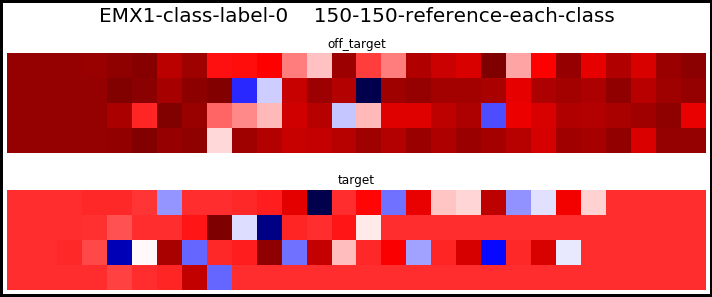

In [311]:
fig  = plt.figure(figsize=(10,4),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
plt.subplots_adjust(hspace = .5, wspace = .5)
plt.subplot(2,1,1)
plt.axis('off')
#ax1 = plt.imshow(c.squeeze(), cmap=cmap1, interpolation='nearest')
plt.imshow(a.squeeze(), cmap='seismic', interpolation='nearest')
plt.title('off_target', color='k')
plt.subplot(2,1,2)
plt.axis('off')
#ax2 = plt.imshow(d.squeeze(), cmap=cmap2, interpolation='nearest')
plt.imshow(b.squeeze(), cmap='seismic', interpolation='nearest')
plt.title('target', color='k')
plt.tight_layout()
fig.suptitle('EMX1-class-label-0    150-150-reference-each-class' , fontsize=20, color='k',y=1.05)
#fig.colorbar(ax1)
plt.show()

In [2]:
####################################################
#################SALIENCY / SMOOTHED SALIENCY STARTS
###################################################

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
import tensorflow as tf

In [3]:
#load directly from npy files
off_dataset = np.load('off_dataset.npy')
target_dataset = np.load('target_dataset.npy')

In [4]:
off_dataset.shape, target_dataset.shape

((153924, 4, 28, 1), (153924, 4, 28, 1))

In [5]:
emx1_pos = [0,1] + list(range(91,473))    #0,1,91-472
emx1_neg = list(range(7234,7278))+list(range(7663,8179))+list(range(10342,11297))+list(range(18566,27290))+list(range(55388,69585))
# 7234-7277,7663-8178,10342-11296,18566-27289,55388-69584

In [6]:
len(emx1_pos),len(emx1_neg)

(384, 24436)

In [7]:
temp_arr = emx1_pos ####emx1_neg for label 0

In [8]:
############# model edits for saliency
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

In [9]:
def loss(output):
    return (output[0][0])

In [10]:
################## maynot be used
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

In [11]:
#### model
model = tf.keras.models.load_model('model_seed10_epoch50.hdf5',compile=False)

In [ ]:
####################### SALIENCY ########

In [13]:
mat_off_shap = np.zeros((len(temp_arr),4,28))
mat_tar_shap = np.zeros((len(temp_arr),4,28))

#saliency = Saliency(model,clone=True)
saliency = Saliency(model,model_modifier=model_modifier,clone=True)
for index,item in enumerate(tqdm(temp_arr)):
    img_x1 = off_dataset[item:item+1]
    img_x2 = target_dataset[item:item+1]
    #print(img_x1.shape,img_x2.shape)
    saliency_map = saliency(loss, [img_x1,img_x2])
    #saliency_map_1,saliency_map_2 = normalize(saliency_map[0]),normalize(saliency_map[1])
    
    #print(saliency_map_1.shape,saliency_map_2.shape)   
        
    mat_off_shap[index,:,:] = normalize(saliency_map[0])
    mat_tar_shap[index,:,:] = normalize(saliency_map[1])
    ##break

  0%|          | 0/384 [00:00<?, ?it/s]/home/xinfy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) normalize. (Inappropriate naming) -- Deprecated since version 0.6.0.
  from ipykernel import kernelapp as app
/home/xinfy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) normalize. (Inappropriate naming) -- Deprecated since version 0.6.0.
  app.launch_new_instance()
100%|██████████| 384/384 [02:01<00:00,  3.16it/s]


In [14]:
mat_off_shap.shape, mat_tar_shap.shape

((384, 4, 28), (384, 4, 28))

In [15]:
overlay_off_shap = np.mean(mat_off_shap,axis=0)
overlay_tar_shap = np.mean(mat_tar_shap,axis=0)

In [16]:
overlay_off_shap.shape,overlay_tar_shap.shape

((4, 28), (4, 28))

In [17]:
a = overlay_off_shap
b = overlay_tar_shap

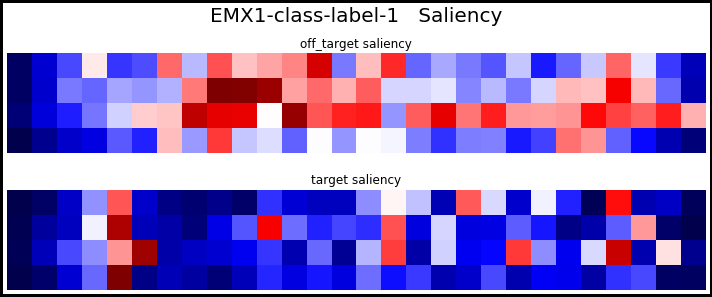

In [19]:
fig  = plt.figure(figsize=(10,4),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .5, wspace = .5)
plt.subplot(2,1,1)
plt.axis('off')
plt.imshow(a, cmap='seismic', interpolation='nearest')
plt.title('off_target saliency', color='k')
plt.subplot(2,1,2)
plt.axis('off')
plt.imshow(b, cmap='seismic', interpolation='nearest')
plt.title('target saliency', color='k')
plt.tight_layout()
fig.suptitle('EMX1-class-label-1   Saliency' , fontsize=20, color='k',y=1.05)
#plt.show()
plt.savefig('EMX1-class_label-1_Saliency'+'.png', dpi=1200)

In [21]:
############################################
######################## SMOOOTHED SALIENCY#
############################################

###### TAKES ABOUT AN HOUR TO RUN


mat_off_shap = np.zeros((len(temp_arr),4,28))
mat_tar_shap = np.zeros((len(temp_arr),4,28))

#saliency = Saliency(model,clone=True)
smooth_saliency = Saliency(model,model_modifier=model_modifier,clone=True)
for index,item in enumerate(tqdm(temp_arr)):
    img_x1 = off_dataset[item:item+1]
    img_x2 = target_dataset[item:item+1]
    #print(img_x1.shape,img_x2.shape)
    saliency_map = smooth_saliency(loss, [img_x1,img_x2], smooth_samples=30,smooth_noise=0.10)
    #saliency_map_1,saliency_map_2 = normalize(saliency_map[0]),normalize(saliency_map[1])
    
    #print(saliency_map_1.shape,saliency_map_2.shape)   
        
    mat_off_shap[index,:,:] = normalize(saliency_map[0])
    mat_tar_shap[index,:,:] = normalize(saliency_map[1])
    ##break

  0%|          | 0/384 [00:00<?, ?it/s]/home/xinfy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated function (or staticmethod) normalize. (Inappropriate naming) -- Deprecated since version 0.6.0.
/home/xinfy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated function (or staticmethod) normalize. (Inappropriate naming) -- Deprecated since version 0.6.0.
100%|██████████| 384/384 [54:42<00:00,  8.55s/it] 


In [22]:
mat_off_shap.shape, mat_tar_shap.shape

((384, 4, 28), (384, 4, 28))

In [23]:
overlay_off_shap = np.mean(mat_off_shap,axis=0)
overlay_tar_shap = np.mean(mat_tar_shap,axis=0)

In [24]:
overlay_off_shap.shape,overlay_tar_shap.shape

((4, 28), (4, 28))

In [25]:
a = overlay_off_shap
b = overlay_tar_shap

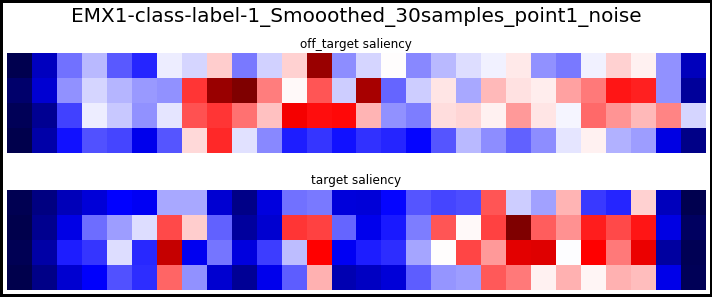

In [27]:
fig  = plt.figure(figsize=(10,4),facecolor="#ffffff",linewidth=6, edgecolor="#000000")
ax = fig.gca()
plt.subplots_adjust(hspace = .5, wspace = .5)
plt.subplot(2,1,1)
plt.axis('off')
plt.imshow(a, cmap='seismic', interpolation='nearest')
plt.title('off_target saliency', color='k')
plt.subplot(2,1,2)
plt.axis('off')
plt.imshow(b, cmap='seismic', interpolation='nearest')
plt.title('target saliency', color='k')
plt.tight_layout()
fig.suptitle('EMX1-class-label-1_Smooothed_30samples_point1_noise' , fontsize=20, color='k',y=1.05)
#plt.show()
plt.savefig('EMX1-class_label-1__Smooothed_30samples_point1_noise'+'.png', dpi=1200)